## Load Dataset

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv("sample_data.csv")

In [3]:
df.head()

,order_id,R_Lon,R_Lat,C_Lon,C_Lat,order_pickedup_time,order_delivered_time
0,PRD_ZMT_2960011,77.063728,28.468983,77.071230,28.449929,2016-04-23 09:30:20,2016-04-23 09:57:04
1,PRD_ZMT_2964555,77.063728,28.468983,77.066637,28.454522,2016-04-23 11:05:32,2016-04-23 11:27:10
2,PRD_ZMT_2968945,77.063728,28.468983,77.067590,28.461570,2016-04-23 14:49:07,2016-04-23 15:07:18
3,PRD_ZMT_2976663,77.063728,28.468983,77.058401,28.455738,2016-04-23 16:43:14,2016-04-23 17:16:12
4,PRD_ZMT_2985948,77.063728,28.468983,77.083967,28.440068,2016-04-24 07:54:14,2016-04-24 08:16:29


## Calculate Total Time Taken

In [4]:
# Convert pickup and delivery times to datetime objects
df['order_pickedup_time'] = pd.to_datetime(df['order_pickedup_time'])
df['order_delivered_time'] = pd.to_datetime(df['order_delivered_time'])

# Calculate ETA (in minutes)
df['ETA'] = (df['order_delivered_time'] - df['order_pickedup_time']).dt.total_seconds() / 60

In [5]:
df.head()

,order_id,R_Lon,R_Lat,C_Lon,C_Lat,order_pickedup_time,order_delivered_time,ETA
0,PRD_ZMT_2960011,77.063728,28.468983,77.071230,28.449929,2016-04-23 09:30:20,2016-04-23 09:57:04,26.733333
1,PRD_ZMT_2964555,77.063728,28.468983,77.066637,28.454522,2016-04-23 11:05:32,2016-04-23 11:27:10,21.633333
2,PRD_ZMT_2968945,77.063728,28.468983,77.067590,28.461570,2016-04-23 14:49:07,2016-04-23 15:07:18,18.183333
3,PRD_ZMT_2976663,77.063728,28.468983,77.058401,28.455738,2016-04-23 16:43:14,2016-04-23 17:16:12,32.966667
4,PRD_ZMT_2985948,77.063728,28.468983,77.083967,28.440068,2016-04-24 07:54:14,2016-04-24 08:16:29,22.250000


## Calculate Distance

In [10]:
# Feature Engineering
df['travel_distance'] = np.sqrt((df['C_Lon'] - df['R_Lon']) ** 2 + (df['C_Lat'] - df['R_Lat']) ** 2)
df['hour_of_day'] = df['order_pickedup_time'].dt.hour
df['day_of_week'] = df['order_pickedup_time'].dt.dayofweek

In [11]:
df.head()

,order_id,R_Lon,R_Lat,C_Lon,C_Lat,order_pickedup_time,order_delivered_time,ETA,travel_distance,hour_of_day,day_of_week
0,PRD_ZMT_2960011,77.063728,28.468983,77.071230,28.449929,2016-04-23 09:30:20,2016-04-23 09:57:04,26.733333,0.020478,9,5
1,PRD_ZMT_2964555,77.063728,28.468983,77.066637,28.454522,2016-04-23 11:05:32,2016-04-23 11:27:10,21.633333,0.014751,11,5
2,PRD_ZMT_2968945,77.063728,28.468983,77.067590,28.461570,2016-04-23 14:49:07,2016-04-23 15:07:18,18.183333,0.008359,14,5
3,PRD_ZMT_2976663,77.063728,28.468983,77.058401,28.455738,2016-04-23 16:43:14,2016-04-23 17:16:12,32.966667,0.014276,16,5
4,PRD_ZMT_2985948,77.063728,28.468983,77.083967,28.440068,2016-04-24 07:54:14,2016-04-24 08:16:29,22.250000,0.035294,7,6


## Objective 1: Identify ETA distributions

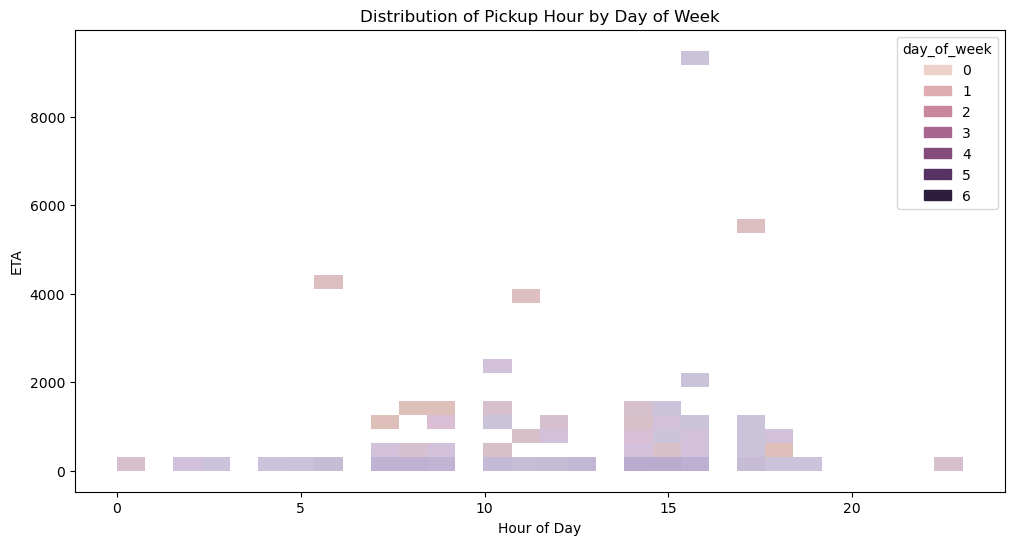

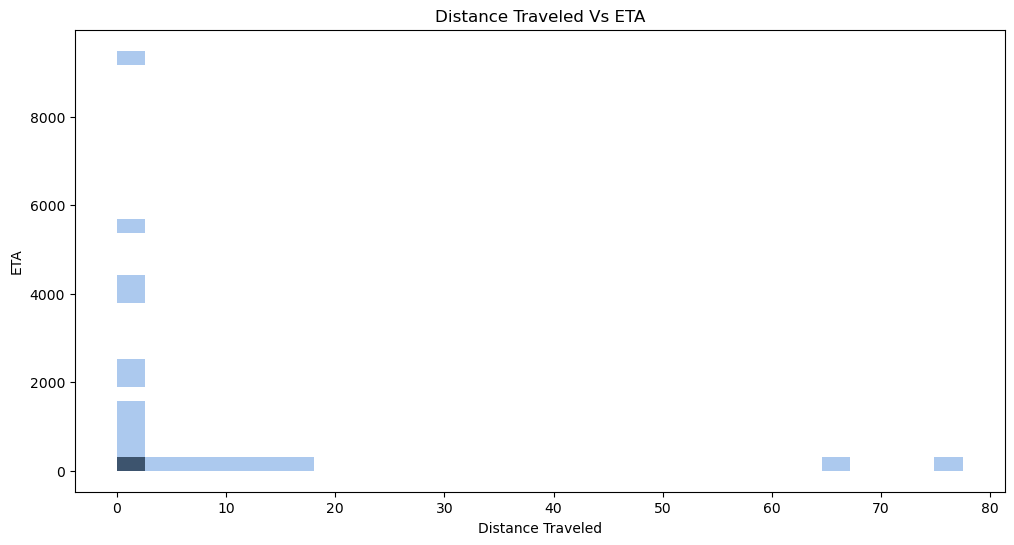

In [40]:
# Plotting ETA distributions based on factors such as time of day and travel distance
plt.figure(figsize=(12, 6))
sns.histplot(df, x='hour_of_day', y="ETA", hue='day_of_week', bins=30, kde=True)
plt.title('Distribution of Pickup Hour by Day of Week')
plt.xlabel('Hour of Day')
plt.ylabel('ETA')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df, x='travel_distance', y="ETA", bins=30, kde=True)
plt.title('Distance Traveled Vs ETA')
plt.xlabel('Distance Traveled')
plt.ylabel('ETA')
plt.show()

## Objective 2: Develop a predictive model for ETA estimation


In [28]:
# Splitting the data into training and testing sets
X = df[['hour_of_day', 'day_of_week', 'travel_distance']]
y = df['ETA']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [29]:
y_pred = model.predict(X_test)

In [30]:
y_pred[:10]

array([19.71900477, 17.94457048, 18.49428106, 18.96212447, 18.95532338,
       19.27507465, 18.83408164, 19.06052009, 18.05627979, 18.92618177])

In [31]:
y_test[:10]

50638     13.733333
201997    22.100000
222305     4.616667
30506     14.066667
208834    18.016667
173867     0.283333
83841     27.300000
55473     10.533333
151202    14.666667
131187     6.083333
Name: ETA, dtype: float64

## Evaluate model

In [32]:
# Model Evaluation
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) score:", r2)

Mean Absolute Error (MAE): 9.628510769729061
Mean Squared Error (MSE): 611.2806306566583
R-squared (R2) score: 0.000197582053434342


           Feature  Coefficient
0      hour_of_day     0.113296
1      day_of_week    -0.106196
2  travel_distance     0.080835


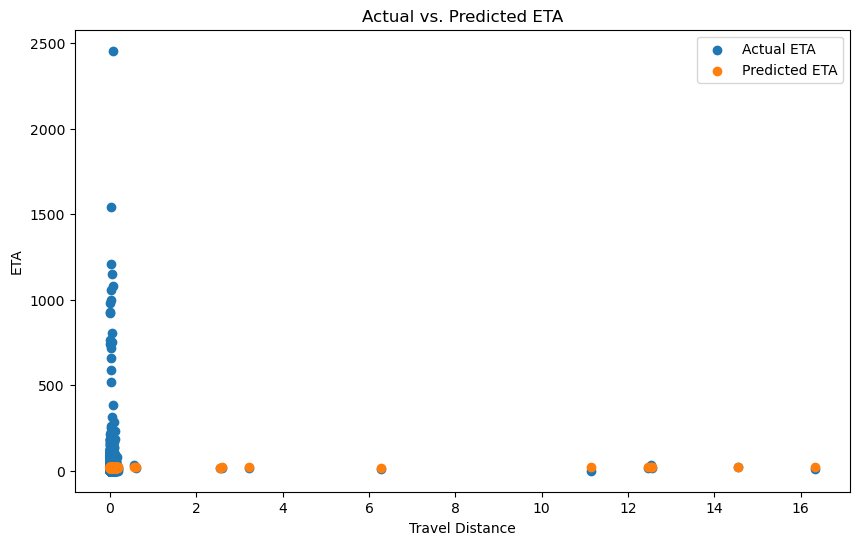

In [33]:
# Model Interpretation
coef_df = pd.DataFrame({'Feature': X_test.columns, 'Coefficient': model.coef_})
print(coef_df)

# Plotting Actual vs. Predicted ETA
plt.figure(figsize=(10, 6))
plt.scatter(X_test["travel_distance"], y_test, label="Actual ETA")
plt.scatter(X_test["travel_distance"], y_pred, label="Predicted ETA")
plt.title('Actual vs. Predicted ETA')
plt.xlabel('Travel Distance')
plt.ylabel('ETA')
plt.legend()
plt.show()